# Homework 3: Cats and Dogs
Applied Neural Networks <br/>
Dr. Leslie Kerby

Kaggle contains many useful datasets and data science competitions. It also has great tutorials and discussion boards. The data for this assignment comes from the [Kaggle Cats vs Dogs competition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview). Images such as these were once used for CAPTCHA (after digits and the alphabet proved too crackable). As stated in the overview, many years ago computer vision experts posited that a classifier with better than 60% accuracy would be difficult without a major advance in the state of the art (you should do better than this even without using CNNs). However, even back in 2014 state of the art machine learning could exceed 80% accuracy on this cat and dog dataset. This meant it was no longer useful for CAPTCHA. Currently, with the utilization of transfer learning this accuracy can exceed 95%.  

**Part 1** <br/>
Download the dataset. Go to [this link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) and set up your computer and Colab to easily download Kaggle datasets. Then download the `dogs-vs-cats-redux-kernels-edition` dataset. <br/>
*Note: You may set up the dataset another way (run jupyter locally etc) if you prefer*

**Part 2**<br/>
Preprocess the dataset (load it into one dataframe and create your `y` labels). <br/> 
Print 5 sample images of dogs and cats (BEFORE they have been resized).

In [ ]:
# You may find the following code hints useful

import os

import pandas as pd

filenames = os.listdir("train/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
# Note: this randomizes the filenames

In [ ]:
df.head(5)

,filename,category
0,dog.5298.jpg,0
1,dog.10960.jpg,0
2,cat.134.jpg,1
3,cat.12444.jpg,1
4,cat.11057.jpg,1


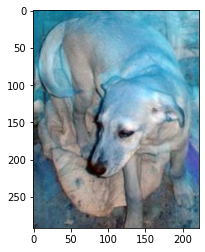

In [ ]:
import cv2
img = cv2.imread('train/train/'+df['filename'][0], cv2.IMREAD_COLOR)
plt.imshow(img)

You can then take `df` and create `y` from it and add each image to `X` (in order as found in df). Note that the images are all different sizes -- so we will need to resize and interpolate them before inputing them in Keras.

In [ ]:
# We haven't covered this yet so I'm giving you the code 
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)


**Part 3**<br/>
Now split the training data into training (15000 images), validation (5000 images), and testing (5000 images) datasets.

**Part 4**<br/>
Try different NN architectures and options. Use KerasTuner (or alternatively the sklearn tools RandomizedSearchCV or GridSearchCV) as part of this. Try at least one deep neural network with at least 50 hidden layers. Clearly state initialization, activation, architecture (including # layers and neurons, and pathways), any normalization/regularization used, and other relevant information for each model. 

You are NOT expected to utilize transfer learning, data augmentation, or convolutional neural networks (these will be added in a future assignment). 

Give converged validation and testing accuracy for each model trained (utilizing the EarlyStopping callback). Which one was the best? Display five misclassified images from your best model. Why do you think it was the best? Note: Your grade for this homework will depend on the quality of your best model.

**Graduate students only**<br/>
Prepare a submission to Kaggle by making predictions on the test data. Submit a screenshot of your submission and accuracy results.